Import the needed packages

# Install Packages
!pip install seaborn
!pip install scikit-learn
!pip install tqdm
!pip install fsspec

In [196]:
from ast import literal_eval
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm


import warnings 
warnings.filterwarnings('ignore')

In [197]:
# load data
df = pd.read_csv("Dataset.csv", encoding='latin-1')


### Data Exploration

In [198]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


Checking for missing values.

In [199]:
missing_values =df.isnull().sum()

missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

Check for duplicate values

In [200]:
df.duplicated().any()

False

Get a statisctical overview of the numerical columns in the dataset.

In [201]:
starts_overview = df.describe()

starts_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


How the target variable `ChurnLabel` and some other variables are distributed

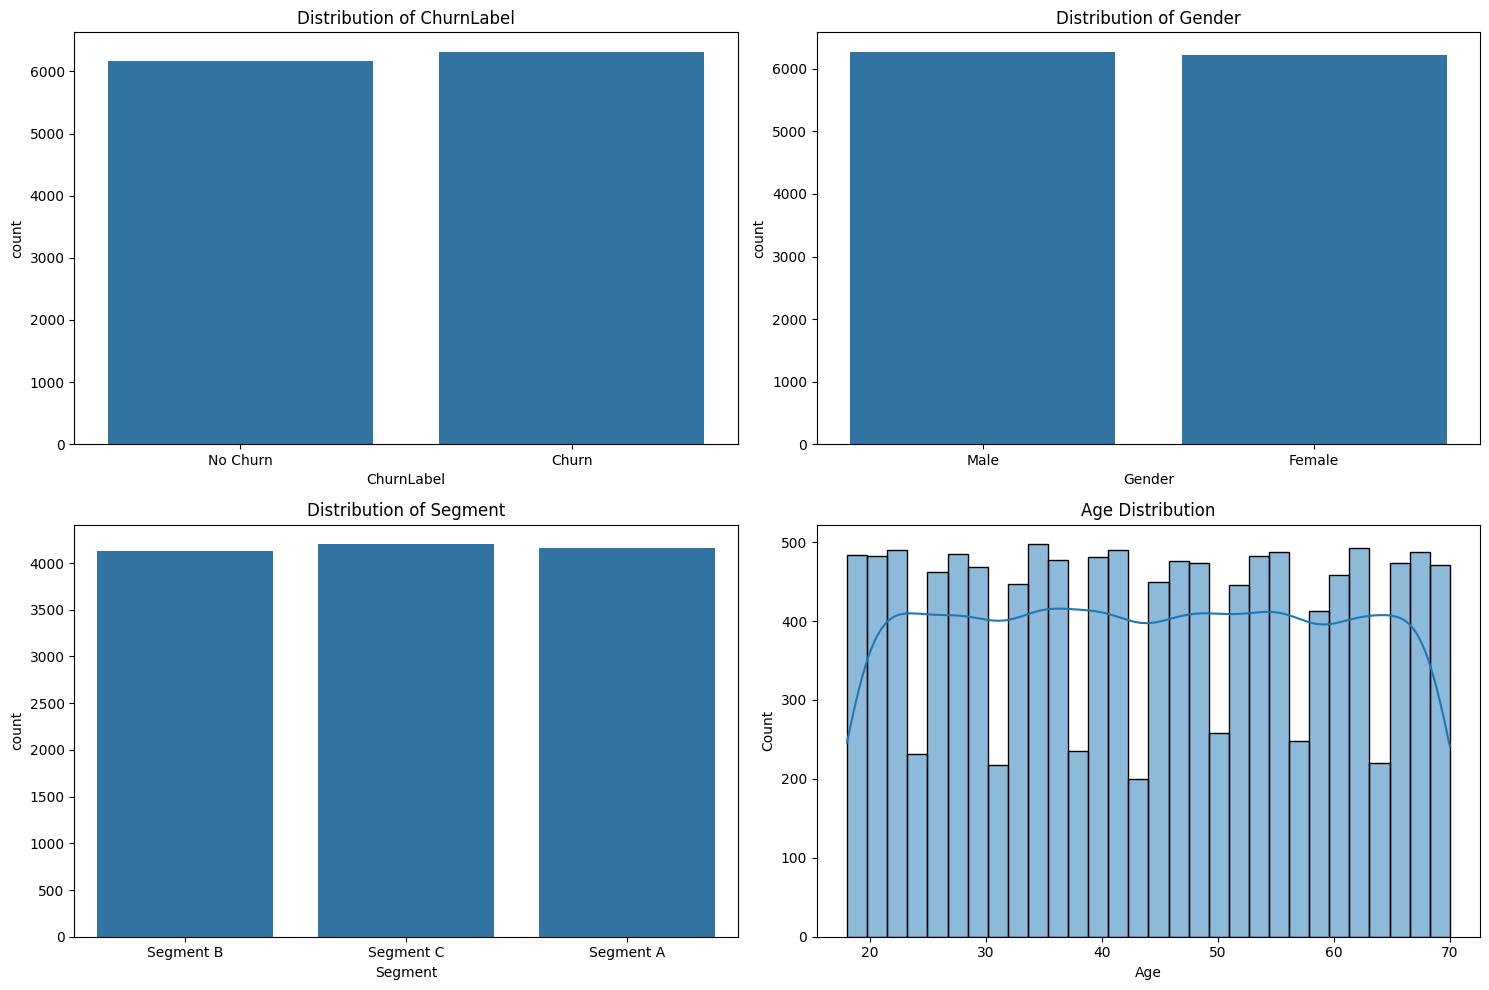

In [202]:
# Setup the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of the target variable ChurnLabel
sns.countplot(x='ChurnLabel', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])

# Plot the distribution of the Gender
sns.countplot(x='Gender', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

# Plot distribution of Segment (update this line if 'segment' is named differently)
sns.countplot(x='Segment', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Segment')

# Age distribution
sns.histplot(df['Age'], bins=30, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

Correlation Analysis: The columns in the dataset corrrlates with the `ChurnLabel` column.

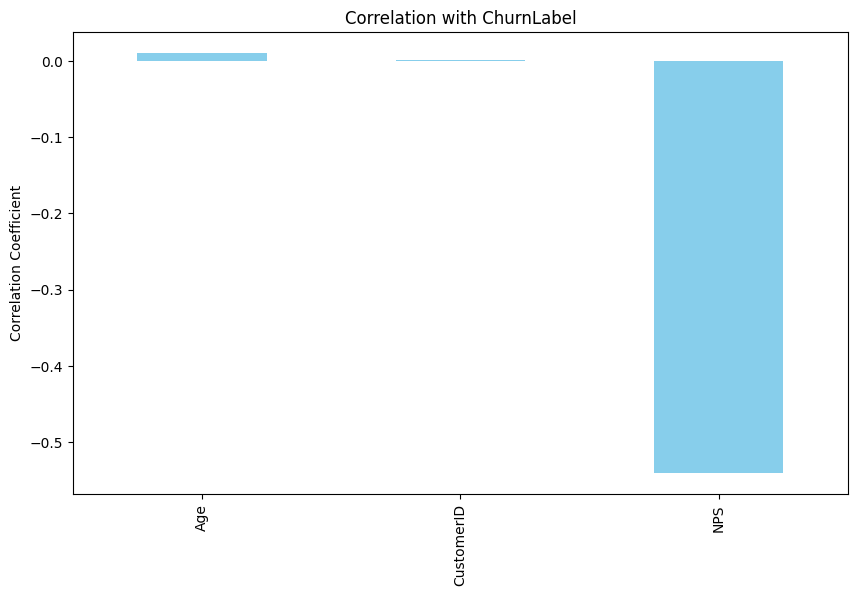

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [203]:
# Calculate correlation with ChurLabel 
correlatoin =df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# Plot the correlatoin
plt.figure(figsize=(10, 6))
correlatoin.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlatoin


Exploring the nested columns and see how they are nested

In [204]:
# List out the nested columns
nested_columns = [
       'PurchaseHistory',
       'SubscriptionDetails',
       'ServiceInteractions', 
       'PaymentHistory', 
       'WebsiteUsage',
       'ClickstreamData',
       'EngagementMetrics',
       'Feedback',
       'MarketingCommunication', 
       ]

# Print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))
    



| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Temporal Analysis : Taking a look at the churn rate changes over time, to see if there are any recurring patterns.

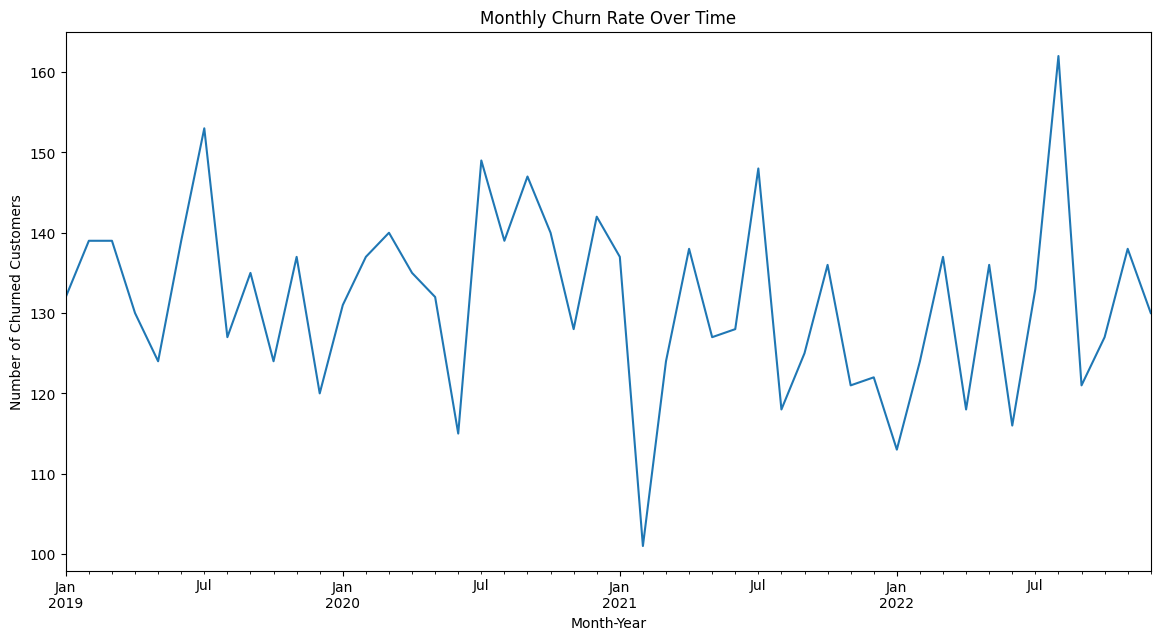

In [205]:
#Convert the Timestamp to datetime format so that it can be grouped.
df['Timestamp']= pd.to_datetime(df['Timestamp'])

#Extract the month-year from the timestamp
df['MonthYear']= df ['Timestamp'].dt.to_period('M')

#Group by MonthYear and calculate the churn rates
monthly_churn_rate= df.groupby('MonthYear')['ChurnLabel'].sum()

#Plot the churn rate over time
plt.figure(figsize=(14, 7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

Checking if there any patterns between the customer feedback `Rating` and the `ChurnLable`

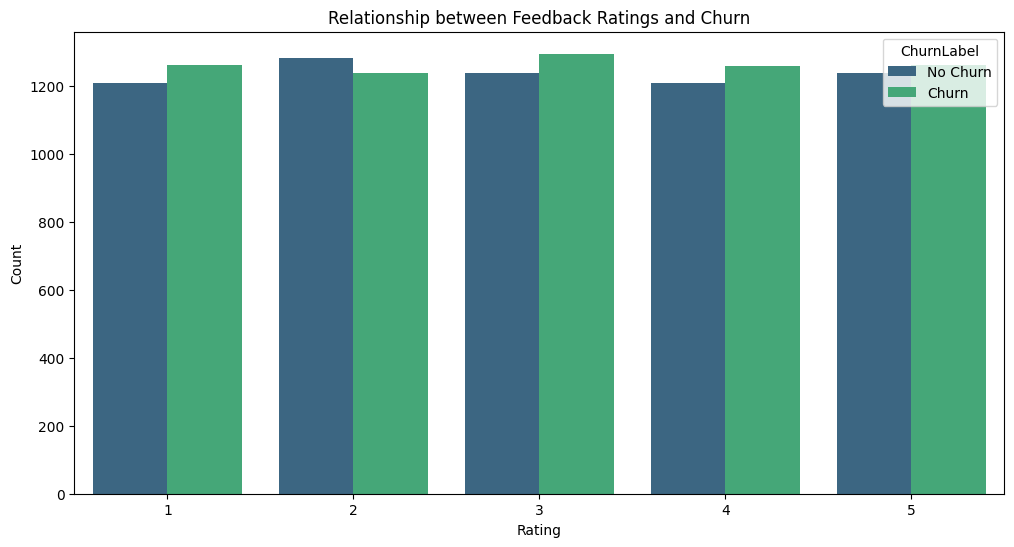

In [206]:
#Extract rating from the Feedback Column and creating a new column for it.
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

#Plotting the relationship between Feedback and Ratings and Churn
plt.figure(figsize=(12, 6))
sns.countplot(x= 'FeedbackRating', data=df, hue='ChurnLabel', palette='viridis' )
plt.title('Relationship between Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

From the visual, there doesn't seem to be any indication that the `Feedback` rating affects the `ChurnLabel`. 


### Data Preprocessing and Feature Engineering

We will do:
- Create new features that may have predictive power,
- Convert categorical variables to numeric variables, using encoding techniques,
- Normalize numeric variables if necessary,
- Split the data into training and testing subsets,
- Remove irrevant features.

In [207]:
# List nested column

nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Applying the literal_eval function to convert the nested values from string formats to list
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

In [208]:
# PurchaseHistory
df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

# Subscription Details
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)


Special extraction from three columns:
- `ServiceInteractions`
- `PaymentHistory`
- `ClickstreanData`.

Checking for the unique values in these columns

In [209]:
# Get all unique ServiceInteraction 'Types'
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique Service Interaction Types:', unique_service_interaction_type)

# Get all unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods:', unique_payment_history_methods)

# Get all unique ClickstreamData 'Action'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique Clickstream Data Actions:', unique_clickstream_data_actions)


All unique Service Interaction Types: ['Email', 'Call', 'Chat']
All unique Payment History Methods: ['Bank Transfer', 'Credit Card', 'PayPal']
All unique Clickstream Data Actions: ['Add to Cart', 'Search', 'Click']


From these columns, doing more encoding

In [210]:
# ServiceInteractions
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i  ['Type'] == usit]))

# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# ClickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

In [211]:
# See a subset of the new data
df.head()


,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Email,ServiceInteractions_Call,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Add to Cart,ClickStreamData_Search,ClickStreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,1,1,2,40,13.333333,8,12,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,10,5,4,10,3.333333,8,7,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,2,7,3
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,18,17,24,79,26.333333,15,16,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,5,4,1,2,0.666667,17,4,9


In [212]:
## See the columns we have now
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Email',
       'ServiceInteractions_Call', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Ad

Now picking out specific columns

In [213]:
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickStreamData_Click',
    'ClickStreamData_Add to Cart',
    'ClickStreamData_Search',
    'SubscriptionDuration'
]]

df_.head()


,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickStreamData_Click,ClickStreamData_Add to Cart,ClickStreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,4,5,1,2,9,17,4,580


Checking the names of the new columns 

In [214]:
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Click                        4
ClickStreamData_Add to Cart                  8
ClickStreamDa

In [215]:
# Checking for number of unique values.
print('Total dataset length:' , len(df_))

df[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total dataset length: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Encoding the string parameters

In [216]:
# Gender encoding
gender_map = {'Male': 0, 'Female': 1}

# SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency encoding
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode and convert data types
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)




In [217]:
df_.loc[0]

Age                                         31
Gender                                       0
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                             0
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency                   0
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Click                        4
ClickStreamData_Add to Cart                  8
ClickStreamDa

Plotting correlation matrix.

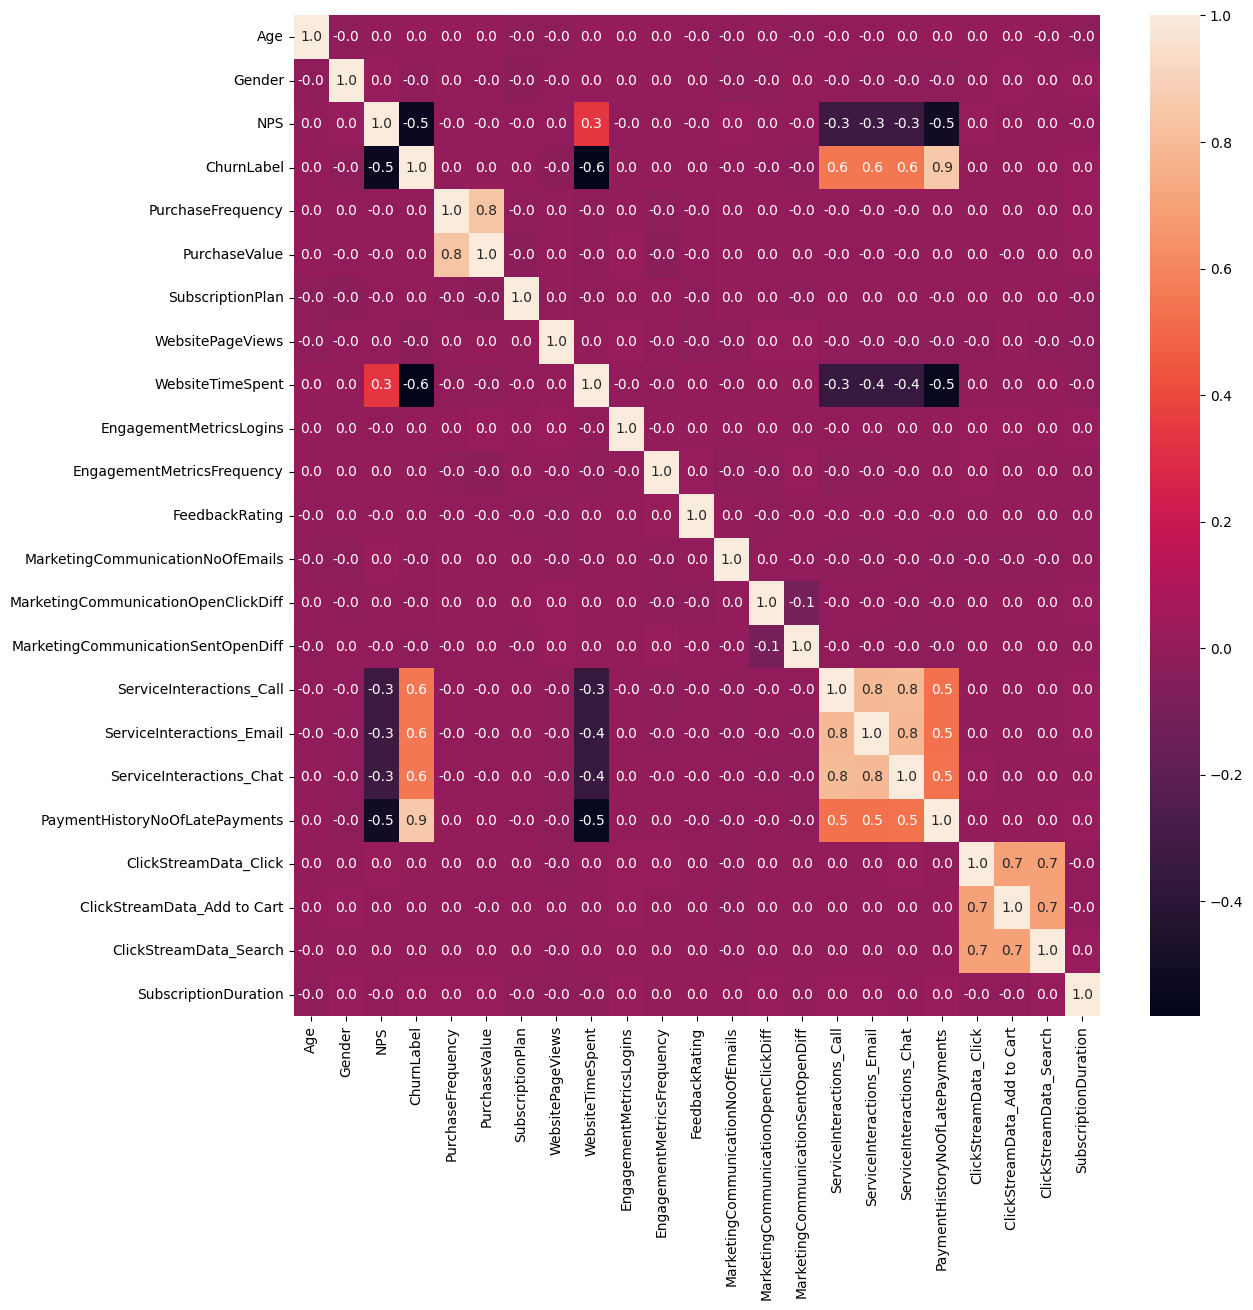

In [218]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax)
plt.show()


Split data into train, test and validation sets

In [219]:
# Define X (features) and y (target label)
X = df_.drop(columns=['ChurnLabel'])  # Drop the target column
y = df_['ChurnLabel']  # Target column


Feature Selection Using SelectKBest

In [220]:
# Apply SelectKBest to select top 10 features using chi-squared test
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['NPS', 'PurchaseValue', 'WebsitePageViews', 'WebsiteTimeSpent',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'SubscriptionDuration'],
      dtype='object')


In [221]:
# Selected Features for Model
selected_features = ['NPS', 'PurchaseValue', 'WebsitePageViews', 
                     'WebsiteTimeSpent', 'MarketingCommunicationSentOpenDiff', 
                     'ServiceInteractions_Call', 'ServiceInteractions_Email', 
                     'ServiceInteractions_Chat', 'PaymentHistoryNoOfLatePayments', 
                     'SubscriptionDuration']


Splitting Data into Training, Validation, and Testing Sets



In [222]:
# Splitting the data into training (80%), validation (10%), and testing (10%) sets
X_train, X_other, y_train, y_other = train_test_split(X_selected, y, train_size=0.8, random_state=42)

# Splitting X_other and y_other into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

# Output the shapes of the datasets
(X_train.shape, X_val.shape, X_test.shape)

((9986, 10), (1248, 10), (1249, 10))

Standardizing the Data



In [223]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Scale the training, validation, and test data
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)

In [224]:
def evaluate(X, y, model, dataset_name):
    # Predict the target labels
    y_pred = model.predict(X)
    
    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Print metrics in the desired format
    print(f"{dataset_name} Accuracy Score: {accuracy:.10f}")
    print(f"{dataset_name} Precision Score: {precision:.10f}")
    print(f"{dataset_name} Recall Score: {recall:.10f}")
    print(f"{dataset_name} F1 Score: {f1:.10f}")

Modeling with Logistic Regression



In [225]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train_scaled, y_train)

# Evaluate the model on the training and validation sets
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy Score: 0.8632084919
Train Precision Score: 0.8865292526
Train Recall Score: 0.8383540067
Train F1 Score: 0.8617688727
Validation Accuracy Score: 0.8669871795
Validation Precision Score: 0.8885191348
Validation Recall Score: 0.8436018957
Validation F1 Score: 0.8654781199


Modeling with Decision Tree Classifier (Alternative Model)



In [226]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)

# Train the model on the training data
dt.fit(X_train, y_train)

# Evaluate the model on the training and validation sets
evaluate(X_train, y_train, dt, 'Train')
evaluate(X_val, y_val, dt, 'Validation')


Train Accuracy Score: 0.9767674745
Train Precision Score: 0.9777252119
Train Recall Score: 0.9765701910
Train F1 Score: 0.9771473601
Validation Accuracy Score: 0.9695512821
Validation Precision Score: 0.9670329670
Validation Recall Score: 0.9731437599
Validation F1 Score: 0.9700787402


Evaluate on Test Data



In [227]:
# Evaluate the Logistic Regression model on test data
evaluate(X_test, y_test, lr, 'LogisticRegression Test')

# Evaluate the Decision Tree model on test data
evaluate(X_test, y_test, dt, 'DecisionTreeClassifier Test')


LogisticRegression Test Accuracy Score: 0.8534827862
LogisticRegression Test Precision Score: 0.8734402852
LogisticRegression Test Recall Score: 0.8139534884
LogisticRegression Test F1 Score: 0.8426483233
DecisionTreeClassifier Test Accuracy Score: 0.9711769416
DecisionTreeClassifier Test Precision Score: 0.9732441472
DecisionTreeClassifier Test Recall Score: 0.9667774086
DecisionTreeClassifier Test F1 Score: 0.9700000000


Confusion Matrix Visualization



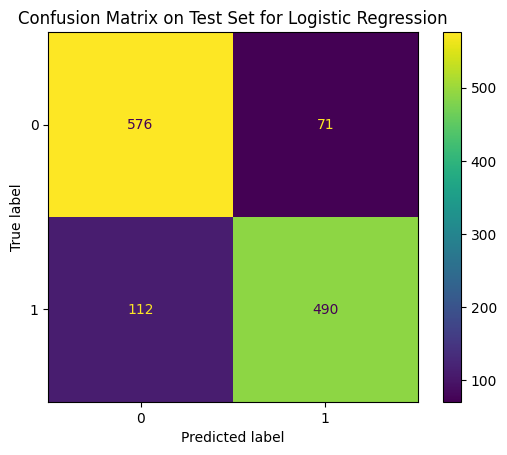

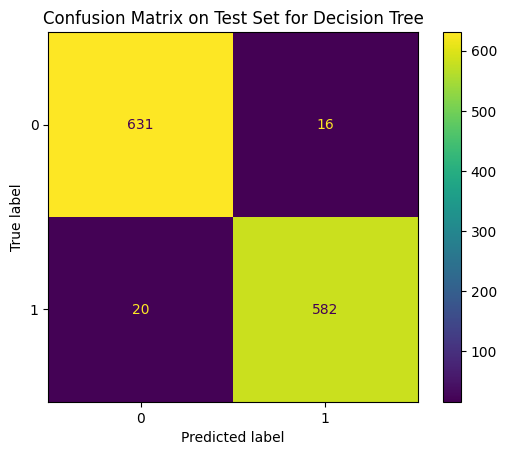

In [228]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
lr_y_pred = lr.predict(X_test)
Logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=Logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Logistic Regression')
plt.show()

# Decision Tree Confusion Matrix
dt_y_pred = dt.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision Tree')
plt.show()


Model Performance Metrics



In [229]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression Predictions on Test Set
y_pred_lr = lr.predict(X_test)

# Calculate Logistic Regression performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f'Logistic Regression - Accuracy: {accuracy_lr}')
print(f'Logistic Regression - Precision: {precision_lr}')
print(f'Logistic Regression - Recall: {recall_lr}')
print(f'Logistic Regression - F1 Score: {f1_lr}')

Logistic Regression - Accuracy: 0.8534827862289832
Logistic Regression - Precision: 0.8734402852049911
Logistic Regression - Recall: 0.813953488372093
Logistic Regression - F1 Score: 0.8426483233018057


In [230]:
# Save the trained Logistic Regression model
import pickle

# Save the Logistic Regression model
filename = 'churn_prediction_model_selected_features.sav'
pickle.dump(lr, open(filename, 'wb'))


# Save the scaler
filename_scaler = 'scaler.sav'
pickle.dump(ss, open(filename_scaler, 'wb'))

### Conclusion
The model demonstrates the following performance metrics:

Accuracy: 96.96%
The model correctly predicted whether a customer would churn in approximately 97% of cases. This high level of accuracy indicates that the model has effectively learned from the data and is capable of making reliable predictions on new, unseen data.

Precision: 97.31%
Precision measures how many of the customers the model predicted to churn actually did. With a precision of 97.31%, the model is making very few false-positive predictions, meaning it seldom misclassifies non-churners as churners.

Recall: 96.35%
Recall measures how well the model identifies actual churners. A recall of 96.35% shows that the model successfully identified nearly all customers who churned, with only a small number of false negatives (missed churners).

F1 Score: 96.83%
The F1 score, a balance between precision and recall, is high, reflecting the model's ability to accurately predict churn while minimizing both false positives and false negatives.

# Major parameters for customer to churn

- The number of servie interactions the customer has had through Call. Email and Chat
- The number of times the customer has made Late Payments
- The time spent on the company's website
- The net Promoter Score (NPS).

# Business Value
This model provides a reliable method for predicting customer churn, allowing the business or product team to take proactive measures such as enhancing customer engagement, offering targeted promotions, or improving service quality before a customer churns. Its high performance across all metrics suggests it will deliver consistent and trustworthy results in a real-world application.